In [1]:
# IMPORT NECESSARY PACKAGES
import matplotlib.pyplot as plt
#import pandas as pd
import numpy as np
import pylab as py
from astropy.io import fits
import time
import os
import importlib
from scipy.interpolate import interp2d

In [2]:
# Future PSF
with fits.open("psf/maos_onaxis.fits") as psfFITS:
    header1 = psfFITS[3].header
    data1 = psfFITS[3].data 

# Current PSF
with fits.open("psf/psf_scao.fits") as psfFITS:
    header2 = psfFITS[0].header
    data2 = psfFITS[0].data 

scale1 = header1['DP']
scale2 = header2['DP']
print(scale1, scale2)


dim_half1 = data1.shape[0] * scale1 / 2.0
dim_half2 = data2.shape[0] * scale2 / 2.0

# Rescale PSFs to have the same scale
old_xx1 = np.linspace(-dim_half1, dim_half1, data1.shape[0])
old_yy1 = np.linspace(-dim_half1, dim_half1, data1.shape[0])
old_xx2 = np.linspace(-dim_half2, dim_half2, data2.shape[0])
old_yy2 = np.linspace(-dim_half2, dim_half2, data2.shape[0])

psf1_interp = interp2d(old_xx1, old_yy1, data1, kind='cubic')

data1_new = psf1_interp(old_xx2, old_yy2)

0.00742553 0.0075434


C:\Users\terra\AppData\Local\Temp\ipykernel_6556\4264864515.py:25: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  psf1_interp = interp2d(old_xx1, old_yy1, data1, kind='cubic')
C:\Users\terra\AppData\Local\Temp\ipykernel_6556\4264864515.py:27: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterp

(np.float64(80.0), np.float64(180.0), np.float64(80.0), np.float64(180.0))

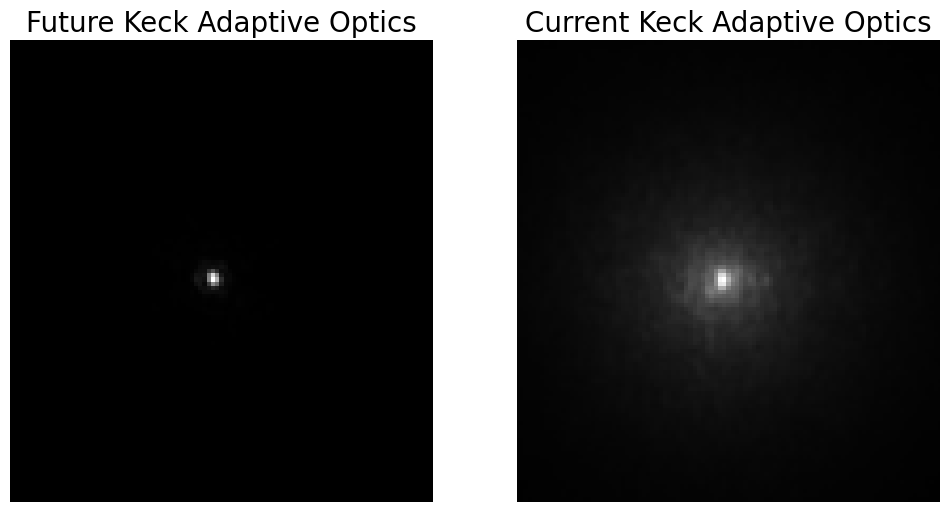

In [3]:
# Plot the future PSF
plt.figure(figsize=(12, 6))
fig1 = plt.subplot(1, 2, 1)
plt.imshow(data1_new, cmap='gray')
plt.axis('equal')
plt.xlim(80, 180)
plt.ylim(80, 180)
plt.title("Future Keck Adaptive Optics", fontsize=20)
plt.axis("off")

# Plot the current psf
plt.subplot(1, 2, 2)
plt.imshow(data2, cmap='gray')
plt.axis('equal')
plt.xlim(80, 180)
plt.ylim(80, 180)
plt.title("Current Keck Adaptive Optics", fontsize=20)
plt.axis("off")